# Desafío - Naive Bayes

__Integrantes:__ 

- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo
- Cristián Contreras


# Descripción

- En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los csv se encuentra en la carpeta dump dentro del proyecto.
- Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
- En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a patir de la letra de una canción.
- Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad trabajaremos con un Multinomial Naive Bayes.

## Preparación del Ambiente de Trabajo

- Importe los módulos numpy, pandas, matplotlib, seaborn, glob y os siguiendo las
buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples
archivos dentro de la carpeta dump .
- Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump
utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente genere
un objeto pd.DataFrame que contenga todos los csv.
- Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [40]:
# Bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

# from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.feature_extraction.text import CountVectorizer

import missingno as msngo
import warnings

from IPython.display import display, Markdown

warnings.filterwarnings('ignore')

In [75]:
# Leer archivos en ruta dump

files = glob.glob("dump/*", recursive=True)

li = []

for filename in files:
    df_file = pd.read_csv(filename, index_col=0)
    li.append(df_file)

df = pd.concat(li, ignore_index=True)
df.columns = ["artista", "genero", "cancion", "letra"]
display(df.head())

,artista,genero,cancion,letra
0,Vital Remains,metal,Human Sacrifice,Taken to death from sacrifice \n Carving out y...
1,Vital Remains,metal,Ressurrected,Doomed to an after life of pain \n Seeing your...
2,Vital Remains,metal,Fallen Angels,Fallen angels souls of hate \n Fallen angels c...
3,Vital Remains,metal,Excruciating Pain,Feel the torment of brutal bestial torture \n ...
4,Vital Remains,metal,Nocturnal Blasphemy,Blasphemy \n Awakened by nocturnal cries \n Su...


## Descripción de los datos

- Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
    - La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
    - La cantidad de canciones registradas en cada género, ordenados de mayor a menor.
- Comente sobre las principales tendencias.

Text(0.5, 1.0, 'Número de canciones registradas por género')

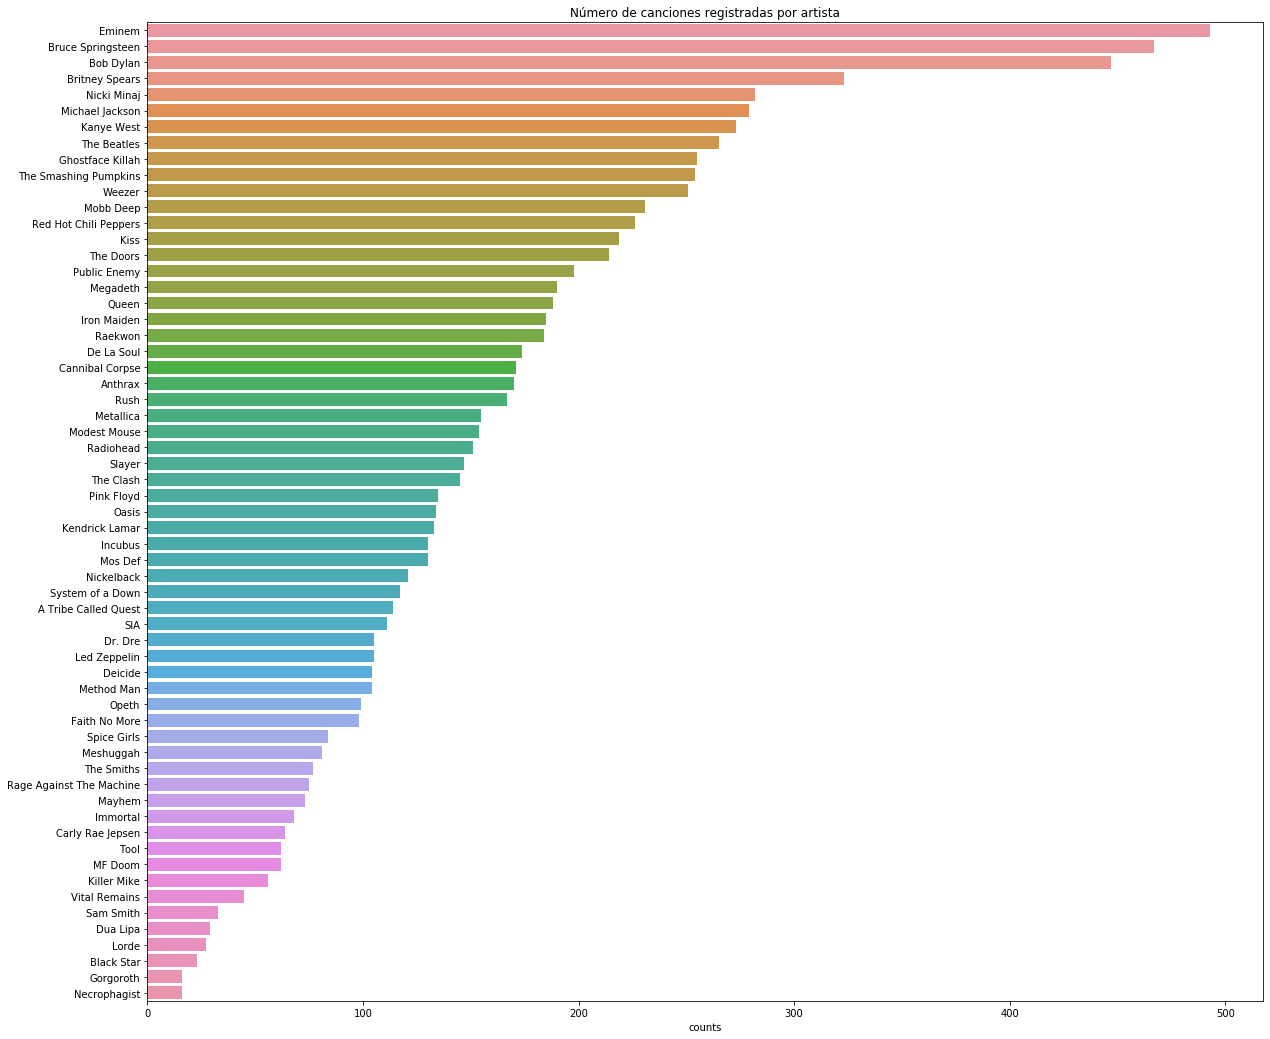

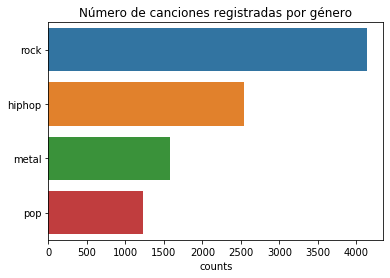

In [81]:
canciones = pd.DataFrame(data={"counts": df["artista"].value_counts()})
genero = pd.DataFrame(data={"counts": df["genero"].value_counts()})

plt.figure(figsize=(20,18))
barplot_art = sns.barplot( x="counts", y=canciones.index, data=canciones)
barplot_art.set_title('Número de canciones registradas por artista')

plt.figure()
barplot_gen = sns.barplot( x="counts", y=genero.index, data=genero)
barplot_gen.set_title('Número de canciones registradas por género')

A partir del gráfico se observa que el rock es el género con más canciones, seguido por el hiphop. En cuento artitas con más canciones el top 3 son: Eminen, Bruce Springsteen y Bob Dylan con más de 400 canciones.

## Matriz de ocurrencias

**Digresión**: Tokenización de Textos.

Para poder trabajar con textos, debemos pasarlos a una matriz dispersa, donde cada fila representará una entrada (en este caso, una canción), y cada columna representará una palabra (token). Este es el proceso de tokenización: Identificar la ocurrencia de una palabra específica dentro de un conjunto de textos (corpus). El tokenizador más simple sklearn.feature_extraction.text.CountVectorizer genera una colección de textos a una matriz que representa la frecuencia dentro del texto de una palabra específica. El tokenizador funciona de la siguiente manera:

```python
from sklearn.feature_extraction.text import CountVectorizer
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english')
# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)
```

- Importe la clase CountVectorizer dentro de los módulos feature_extraction.text de la librería sklearn . Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase? 
    - **Respuesta**:
        - CountVectorizer convierte la columna de texto en una matriz en la que cada palabra es una columna cuyo valor es el número de veces que dicha palabra aparece.
- Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.
- Genere una función que replique el procedimiento para cada uno de los géneros.
- Comente sobre las principales características de cada género en cuanto a sus palabras.

In [74]:
count_vec = CountVectorizer(lowercase = True, stop_words="english", analyzer='word', max_features=100)
count_train = count_vec.fit(df["lyric"])

display(Markdown("#### 100 palabras más repetidas en toda la base de datos"))
display(count_vec.get_feature_names())

df.groupby["genero"]

#### 100 palabras más repetidas en toda la base de datos

['ah',
 'ain',
 'ass',
 'away',
 'baby',
 'bad',
 'better',
 'big',
 'bitch',
 'black',
 'boy',
 'cause',
 'come',
 'day',
 'dead',
 'death',
 'did',
 'die',
 'don',
 'em',
 'end',
 'everybody',
 'eyes',
 'face',
 'feel',
 'fuck',
 'girl',
 'god',
 'gone',
 'gonna',
 'good',
 'got',
 'gotta',
 'hard',
 'head',
 'hear',
 'heart',
 'hey',
 'high',
 'hit',
 'hold',
 'home',
 'inside',
 'just',
 'know',
 'la',
 'leave',
 'left',
 'let',
 'life',
 'light',
 'like',
 'little',
 'live',
 'll',
 'long',
 'look',
 'love',
 'make',
 'man',
 'mind',
 'money',
 'need',
 'new',
 'nigga',
 'niggas',
 'night',
 'oh',
 'ooh',
 'people',
 'play',
 'real',
 'really',
 'right',
 'rock',
 'run',
 'said',
 'say',
 'shit',
 'soul',
 'stop',
 'tell',
 'thing',
 'things',
 'think',
 'till',
 'time',
 'tonight',
 'try',
 'turn',
 'uh',
 've',
 'wanna',
 'want',
 'way',
 'won',
 'world',
 'ya',
 'yeah',
 'yo']